# Make molchan?

In [1]:
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt
from scipy.optimize import fsolve


# The Math
The confidence curves on the Molchan diagram result from solving
$$
\alpha = \sum_{i=h}^N\left[{N \choose i}\tau^i(1-\tau)^{N-i}\right]
$$
Where $N = $ total number of alarmable spatiotemporal instances, $h = $ the number of these instances that were alarmed by chance, $\tau = $ the fraction of space-time occupied by alarm (maybe seperated across space), and $\alpha$ the confidence interval.

In [19]:
#python version of above equation
def func(a, N, h, tau):
    out = 0
    for i in range(h, N+1):
        out += comb(N, i) * (tau**i) * (1-tau)**(N-i)
        
    return out - a

#Solves for one tau
def get_tau(a, N, h):
    sfunc = lambda tau : func(a, N, h, tau)
    
    x = np.arange(0, 1, 0.01)
    y = np.array([sfunc(datum) for datum in x])
    init_guess = np.argmax(y > 0)/100
    
    return fsolve(sfunc, init_guess)

#Gives all the taus
def get_taus(a, N, h):
    taus = np.zeros(h.shape)
    
    for i in range(len(h)):
        taus[i] = get_tau(a, N, i)
        
    return taus
        
#Plots a molchan
def plot_molchan(N):
    h = np.arange(N+1)
    
    plt.figure()
    plt.plot(np.linspace(0, 1, 10), np.linspace(0, N, 10), 'r--')
    for a in [0.001, 0.01, 0.05, 0.25, 0.50]:
        plt.plot(get_taus(a, N, h), h, label=r'$\alpha$ = ' + str(a))
    plt.xlim([0, 1])
    plt.ylim([N, 0])
    plt.legend()
    plt.title("Molchan Diagram")
    plt.show()

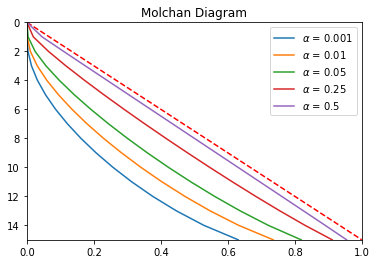

In [22]:
plot_molchan(15)